In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Change in xPoints (24/25 - 23/24)
xpoints_change = [       
    ("Arsenal", -12),               
    ("Aston Villa", 3),  
    ("Bournemouth", 10), 
    ("Brentford", 2),               
    ("Brighton", 2),  
    ("Chelsea", 2),                 
    ("Cry. Palace", 9),          
    ("Everton", -4),                 
    ("Fulham", 7),                  
    ("Liverpool", 3),               
    ("Man. City", -14),        
    ("Man. Utd", 7),       
    ("Newcastle", 0),        
    ("Nott Forest", 0),
    ("Spurs", -7),    
    ("West Ham", 1),           
    ("Wolves", 3)]

# Change in xG (24/25 - 23/24)
xg_change = [
    ("Arsenal", -15.8),
    ("Aston Villa", -7.4),
    ("Bournemouth", 8.2),
    ("Brentford", 0.4),
    ("Brighton", 1.2),
    ("Chelsea", -6.1),
    ("Cry. Palace", 12.2),
    ("Everton", -12.8),
    ("Fulham", -2.1),
    ("Liverpool", -5.9),
    ("Man. City", -12.7),
    ("Man. Utd", -3.4),
    ("Newcastle", -11.7),
    ("Nott Forest", -3.7),
    ("Spurs", -9.3),
    ("West Ham", -4.8),
    ("Wolves", -3.2),]

club_spend_24_25 = [   # in millions
    ("Arsenal", 101.5),
    ("Aston Villa", 129.5),
    ("Bournemouth", 80.7),
    ("Brentford", 97.5),
    ("Brighton", 192.0),
    ("Chelsea", 219.6),
    ("Cry. Palace", 76.0),
    ("Everton", 46.0),
    ("Fulham", 89.0),
    ("Liverpool", 41.5),
    ("Man. City", 33.6),
    ("Man. Utd", 205.9),
    ("Newcastle", 43.0),
    ("Nott Forest", 90.3),
    ("Spurs", 133.5),
    ("West Ham", 132.5),
    ("Wolves", 53.3)]

income_24_25 = [
    ("Arsenal", 97.5),
    ("Aston Villa", 136.4),
    ("Bournemouth", 65.0),
    ("Brentford", 67.0),
    ("Brighton", 40.5),
    ("Chelsea", 153.3),
    ("Cry. Palace", 98.3),
    ("Everton", 70.2),
    ("Fulham", 47.4),
    ("Liverpool", 62.5),
    ("Man. City", 146.9),
    ("Man. Utd", 94.7),
    ("Newcastle", 65.0),
    ("Nott Forest", 47.0),
    ("Spurs", 62.9),
    ("West Ham", 32.5),
    ("Wolves", 94.0)]

net_spend_24_25 = [
    ("Arsenal", 4.0),
    ("Aston Villa", -6.9),
    ("Bournemouth", 15.7),
    ("Brentford", 30.5),
    ("Brighton", 151.5),
    ("Chelsea", 66.3),
    ("Cry. Palace", -22.3),
    ("Everton", -24.2),
    ("Fulham", 41.6),
    ("Liverpool", -21.0),
    ("Man. City", -113.3),
    ("Man. Utd", 111.2),
    ("Newcastle", -22.0),
    ("Nott Forest", 43.3),
    ("Spurs", 70.6),
    ("West Ham", 100.0),
    ("Wolves", -40.7)]

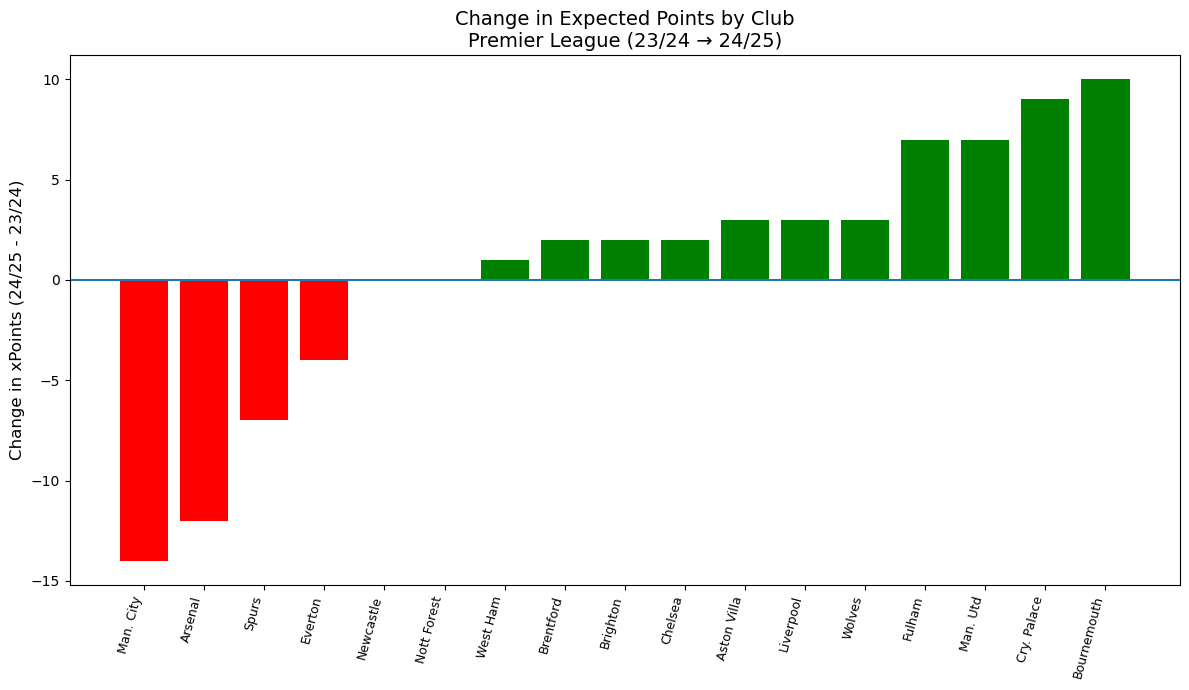

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sort from least gained to most gained
xpoints_sorted = sorted(xpoints_change, key=lambda x: x[1])

teams = [team for team, value in xpoints_sorted]
values = [value for team, value in xpoints_sorted]

# Assign colors
colors = ["green" if v > 0 else "red" if v < 0 else "grey" for v in values]

plt.figure(figsize=(12, 7))
bars = plt.bar(teams, values, color=colors)

plt.axhline(0)

plt.xticks(rotation=75, ha='right', fontsize=9)
plt.ylabel("Change in xPoints (24/25 - 23/24)", fontsize=12)
plt.title("Change in Expected Points by Club\nPremier League (23/24 → 24/25)", fontsize=14)

plt.tight_layout()
plt.show()


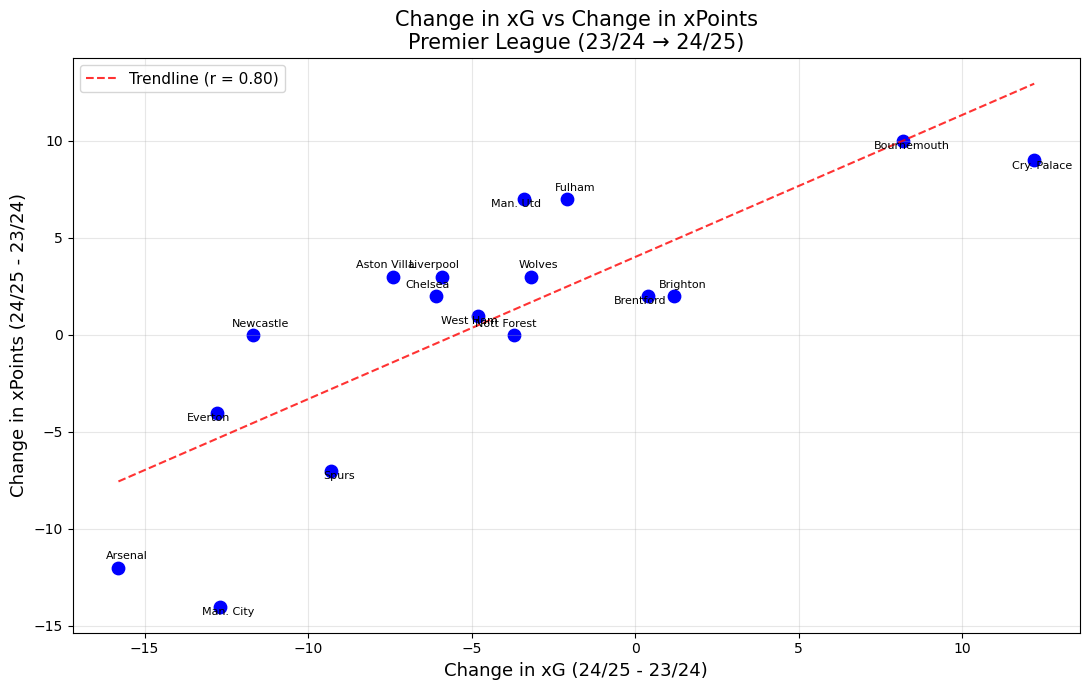

In [27]:
import matplotlib.pyplot as plt
import numpy as np

xp_dict = dict(xpoints_change)
xg_dict = dict(xg_change)

teams = sorted(xp_dict.keys())

xp_values = np.array([xp_dict[t] for t in teams])
xg_values = np.array([xg_dict[t] for t in teams])

# Manual correlation
xg_mean = np.mean(xg_values)
xp_mean = np.mean(xp_values)

numerator = sum((x - xg_mean) * (y - xp_mean) for x, y in zip(xg_values, xp_values))
denom_xg = np.sqrt(sum((x - xg_mean) ** 2 for x in xg_values))
denom_xp = np.sqrt(sum((y - xp_mean) ** 2 for y in xp_values))

correlation = numerator / (denom_xg * denom_xp)

# Plot
plt.figure(figsize=(11, 7))
plt.scatter(xg_values, xp_values, color='blue', s=80)

# Offset pattern to reduce overlap
offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, team in enumerate(teams):
    dx, dy = offsets[i % 4]
    plt.annotate(team,
                 (xg_values[i], xp_values[i]),
                 textcoords="offset points",
                 xytext=(dx, dy),
                 ha='center',
                 fontsize=8)

# Trendline
z = np.polyfit(xg_values, xp_values, 1)
p = np.poly1d(z)
x_line = np.linspace(min(xg_values), max(xg_values), 100)

plt.plot(x_line, p(x_line), "r--", alpha=0.8,
         label=f'Trendline (r = {correlation:.2f})')

plt.xlabel('Change in xG (24/25 - 23/24)', fontsize=13)
plt.ylabel('Change in xPoints (24/25 - 23/24)', fontsize=13)
plt.title('Change in xG vs Change in xPoints\nPremier League (23/24 → 24/25)', fontsize=15)

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

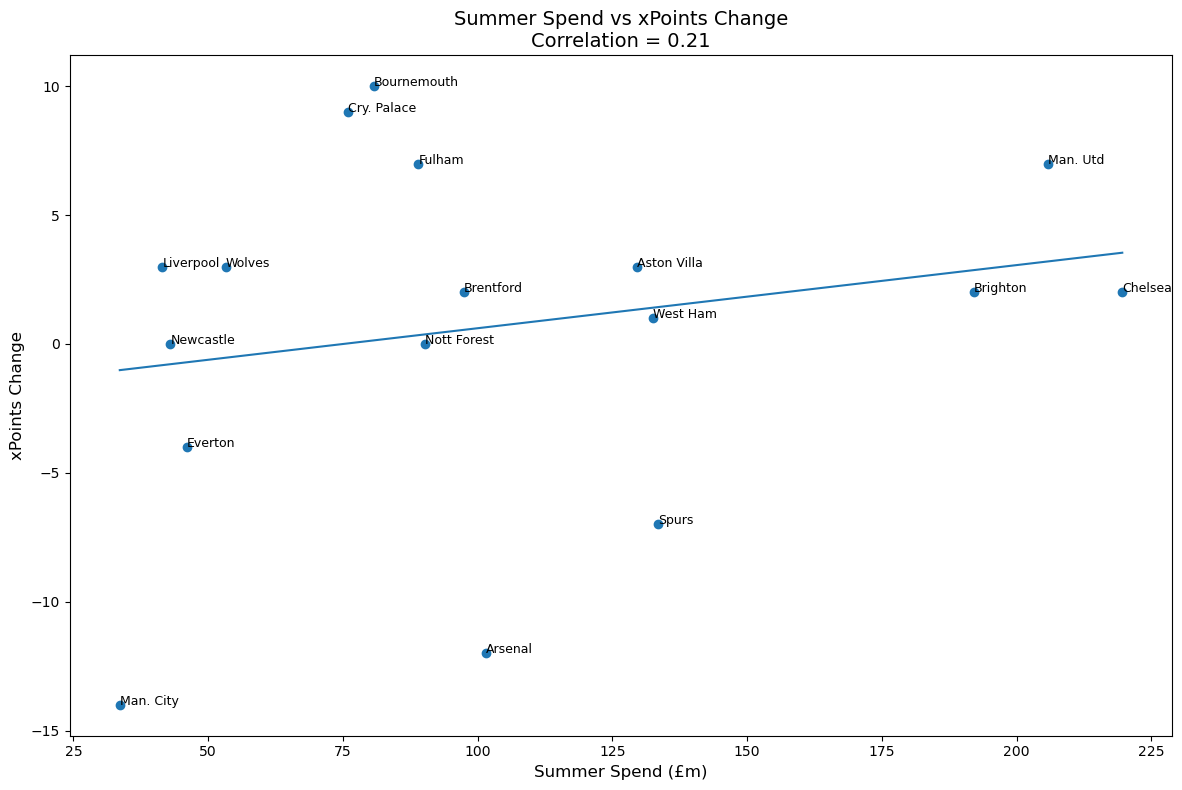

In [30]:
# Convert to dictionaries
xpoints_dict = dict(xpoints_change)
spend_dict = dict(club_spend_24_25)

# Align data alphabetically
clubs = sorted(spend_dict.keys())
spend = np.array([spend_dict[c] for c in clubs])
xpoints = np.array([xpoints_dict[c] for c in clubs])

# Correlation
correlation = np.corrcoef(spend, xpoints)[0, 1]

# Line of best fit
slope, intercept = np.polyfit(spend, xpoints, 1)
line_x = np.linspace(min(spend), max(spend), 100)
line_y = slope * line_x + intercept

# Plot (larger + clearer)
plt.figure(figsize=(12, 8))
plt.scatter(spend, xpoints)

for i, club in enumerate(clubs):
    plt.text(spend[i], xpoints[i], club, fontsize=9)

plt.plot(line_x, line_y)

plt.xlabel("Summer Spend (£m)", fontsize=12)
plt.ylabel("xPoints Change", fontsize=12)
plt.title(f"Summer Spend vs xPoints Change\nCorrelation = {correlation:.2f}", fontsize=14)

plt.tight_layout()
plt.show()

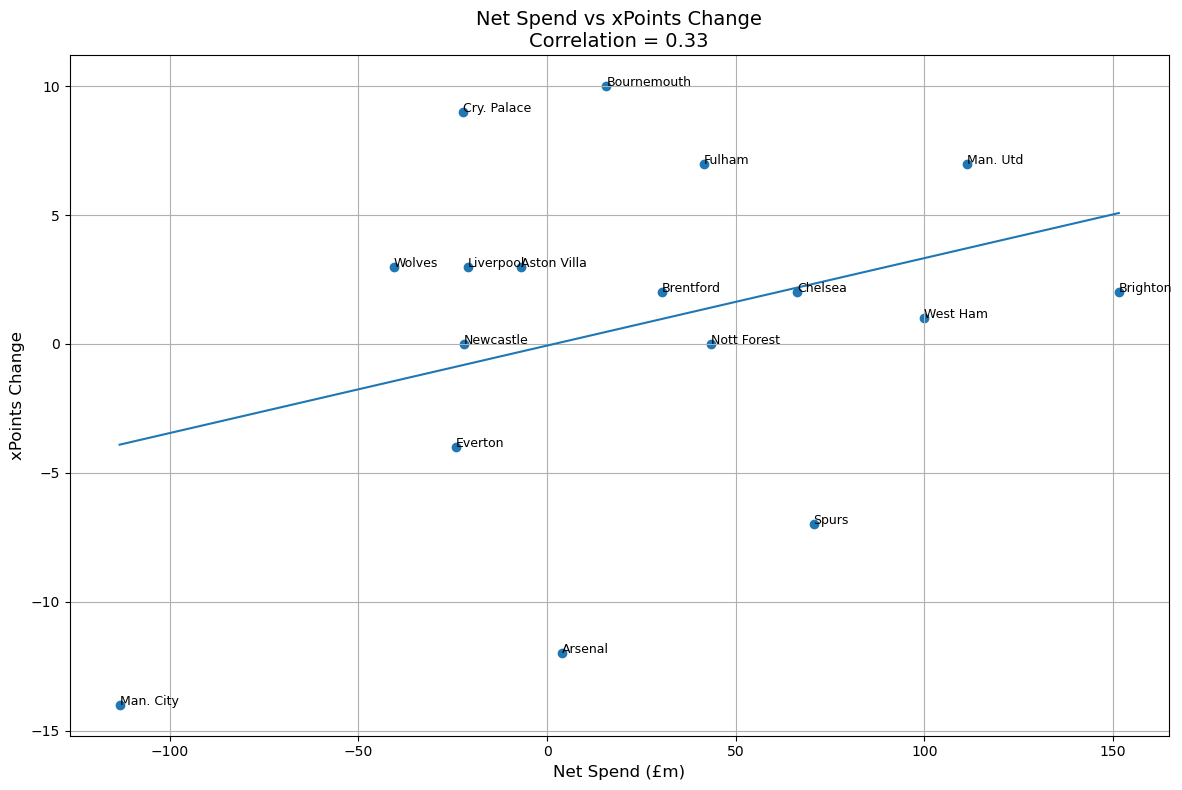

In [33]:
# Convert to dictionaries
xpoints_dict = dict(xpoints_change)
net_dict = dict(net_spend_24_25)

# Align alphabetically
clubs = sorted(net_dict.keys())
net = np.array([net_dict[c] for c in clubs])
xpoints = np.array([xpoints_dict[c] for c in clubs])

# Correlation
correlation = np.corrcoef(net, xpoints)[0, 1]

# Line of best fit
slope, intercept = np.polyfit(net, xpoints, 1)
line_x = np.linspace(min(net), max(net), 100)
line_y = slope * line_x + intercept

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(net, xpoints)

for i, club in enumerate(clubs):
    plt.text(net[i], xpoints[i], club, fontsize=9)

plt.plot(line_x, line_y)

plt.xlabel("Net Spend (£m)", fontsize=12)
plt.ylabel("xPoints Change", fontsize=12)
plt.title(f"Net Spend vs xPoints Change\nCorrelation = {correlation:.2f}", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
